In [2]:
import pandas as pd
path="/Users/pranathi/Library/CloudStorage/OneDrive-ErasmusUniversityRotterdam/Masters/Case_Study_AH/download/"
file_train_product="training/product_details_train.csv"
file_train_calender="training/calendar.csv"
file_train_promo="training/promotion_details_train.csv"
file_train_transaction="training/transactions_train.csv"
file_train_weather="training/weather_data.csv"


file_forecast_product="forecasting/forecast_product_details.csv"
file_forecast_calender="forecasting/forecast_calendar.csv"
file_forecast_promo="forecasting/forecast_promotion_details.csv"
file_forecast_transaction="forecasting/forecast_transactions.csv"


In [6]:
# Importing training data
df_calendar_train = pd.read_csv(path+file_train_calender, sep=';', engine='python')
df_product_details_train = pd.read_csv(path+file_train_product, sep=';', engine='python')
df_promotion_details_train = pd.read_csv(path+file_train_promo, sep=';', engine='python')
df_transactions_train = pd.read_csv(path+file_train_transaction, sep=';', engine='python')
df_weather_train = pd.read_csv(path+file_train_weather, sep=';', engine='python')

# Importing forecasting data
df_calendar_forecast = pd.read_csv(path+file_forecast_calender, sep=';', engine='python')
df_product_details_forecast = pd.read_csv(path+file_forecast_product, sep=';', engine='python')
df_promotion_details_forecast = pd.read_csv(path+file_forecast_promo, sep=';', engine='python')
df_transactions_forecast = pd.read_csv(path+file_forecast_transaction, sep=';', engine='python')

# List of Training DataFrames
train_dfs = [
    df_calendar_train,
    df_product_details_train,
    df_promotion_details_train,
    df_transactions_train,
    df_weather_train
]

# List of Forecasting DataFrames
forecast_dfs = [
    df_calendar_forecast,
    df_product_details_forecast,
    df_promotion_details_forecast,
    df_transactions_forecast
]

# Names of dataframes
train_names = ['Calendar', 'Product', 'Promotion', 'Transactions', 'Weather']
forecast_names = ['Calendar', 'Product', 'Promotion', 'Transactions']

In [4]:
df_merged = df_product_details_train.merge(df_transactions_train, on='articleId',how='inner')
len(df_merged)

343849

In [5]:
df_merged 

,articleId,category,mainProductGroup,date,storeCount,FSC_index,sales_volume_index,promo_id
0,0112d194d01727f5f5ba3c835c9ef20b76a3432d74f771...,"Vlees, Kip en Vis",Vlees,01-01-2021,619,100.000000,100.000000,NaN
1,0112d194d01727f5f5ba3c835c9ef20b76a3432d74f771...,"Vlees, Kip en Vis",Vlees,02-01-2021,894,168.861386,675.253809,NaN
2,0112d194d01727f5f5ba3c835c9ef20b76a3432d74f771...,"Vlees, Kip en Vis",Vlees,03-01-2021,833,156.435644,299.038072,NaN
3,0112d194d01727f5f5ba3c835c9ef20b76a3432d74f771...,"Vlees, Kip en Vis",Vlees,04-01-2021,892,167.805281,359.316543,NaN
4,0112d194d01727f5f5ba3c835c9ef20b76a3432d74f771...,"Vlees, Kip en Vis",Vlees,05-01-2021,892,168.151815,445.507165,NaN
...,...,...,...,...,...,...,...,...
343844,ff3fbb8f7ee1a02cb129cf4b5ec3c930e6f821b28701dd...,"Vlees, Kip en Vis",Visconserven,26-11-2024,808,131.190476,194.767851,NaN
343845,ff3fbb8f7ee1a02cb129cf4b5ec3c930e6f821b28701dd...,"Vlees, Kip en Vis",Visconserven,27-11-2024,810,131.516291,178.463029,NaN
343846,ff3fbb8f7ee1a02cb129cf4b5ec3c930e6f821b28701dd...,"Vlees, Kip en Vis",Visconserven,28-11-2024,812,131.842105,197.165111,NaN
343847,ff3fbb8f7ee1a02cb129cf4b5ec3c930e6f821b28701dd...,"Vlees, Kip en Vis",Visconserven,29-11-2024,812,131.842105,150.769381,NaN


In [7]:
#number of days between 01/01/2021-30/11/2024
import pandas as pd
from datetime import date

# Calculate total days between 01/01/2021 and 30/11/2024
start_date = date(2021, 1, 1)
end_date = date(2024, 11, 30)
total_days = (end_date - start_date).days + 1  # +1 includes both start/end
print(f"Total days: {total_days}")  # 1432 days


Total days: 1430


In [8]:
# Count unique dates (days) per articleId
days_per_article = df_merged.groupby('articleId')['date'].nunique().reset_index()
days_per_article.columns = ['articleId', 'unique_days_count']

print("Days of data per article:")
print(days_per_article.head(10))
print(f"\nSummary statistics:")
print(days_per_article['unique_days_count'].describe())

# Distribution of days coverage
print("\nDays distribution:")
print(days_per_article['unique_days_count'].value_counts().sort_index())

# Articles with most/least coverage
print("\nTop 5 articles by days:")
print(days_per_article.nlargest(5, 'unique_days_count'))

print("\nBottom 20 articles by days:")
print(days_per_article.nsmallest(20, 'unique_days_count'))


Days of data per article:
                                           articleId  unique_days_count
0  0112d194d01727f5f5ba3c835c9ef20b76a3432d74f771...                935
1  030c9c75de06d0aee298db030bf76b1933bb5a9a28e3fb...               1430
2  03a945e32405653c15915432f70ca7ec3b3709fe6abf28...               1430
3  05f353ef4d503dd53818830120f4f479815b22d5ecc1c5...               1430
4  06e708c215c11fe45c8b08104348be1cbdbd7ab7c1bf3e...               1430
5  08de1ee6ef87f89799ac617cd8dded4209dd6abf6d8012...               1430
6  09626761cbe18bcd3936ea7fcb2d124e8400adec275b7c...               1428
7  0a2444a44e8f1e9836b3439d19388b602df384d97c7b6c...               1430
8  0b5ca6606b480ebaa00f4f6c39a04f21a3c915c07b1f2e...               1430
9  0b6d4dad6a7d12196ea20d88d824342b5620ad8d975ba2...               1430

Summary statistics:
count     248.000000
mean     1386.487903
std       212.691752
min        57.000000
25%      1430.000000
50%      1430.000000
75%      1430.000000
max      1430.

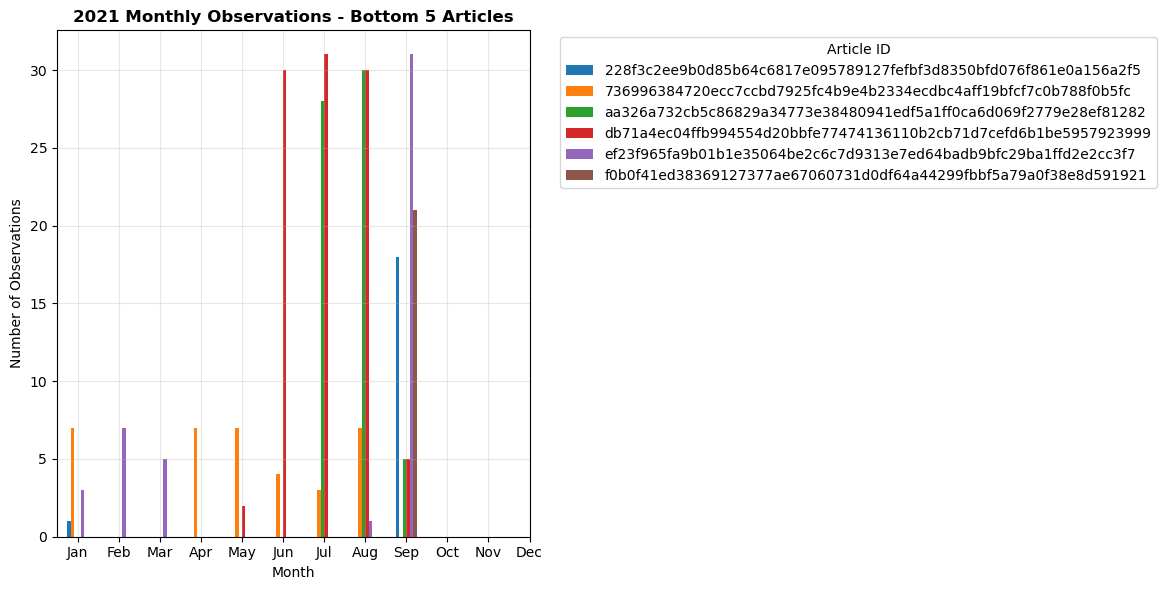

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get bottom 5 articles
bottom_5 = days_per_article.nsmallest(7, 'unique_days_count')['articleId'].tolist()

# Filter for bottom 5 + convert date format "01-01-2021" → datetime
bottom_data_2021 = df_merged[df_merged['articleId'].isin(bottom_5)].copy()
bottom_data_2021['date'] = pd.to_datetime(bottom_data_2021['date'], format='%d-%m-%Y')

# Filter for 2021 only
bottom_data_2021 = bottom_data_2021[bottom_data_2021['date'].dt.year == 2021]

# Extract month and count observations per article-month
bottom_data_2021['month'] = bottom_data_2021['date'].dt.month
monthly_counts = bottom_data_2021.groupby(['articleId', 'month']).size().reset_index(name='observations')

# Pivot for bar plot
monthly_pivot = monthly_counts.pivot(index='month', columns='articleId', values='observations').fillna(0)

# Create grouped bar plot
plt.figure(figsize=(12, 6))
monthly_pivot.plot(kind='bar', ax=plt.gca())
plt.title('2021 Monthly Observations - Bottom 5 Articles', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(title='Article ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


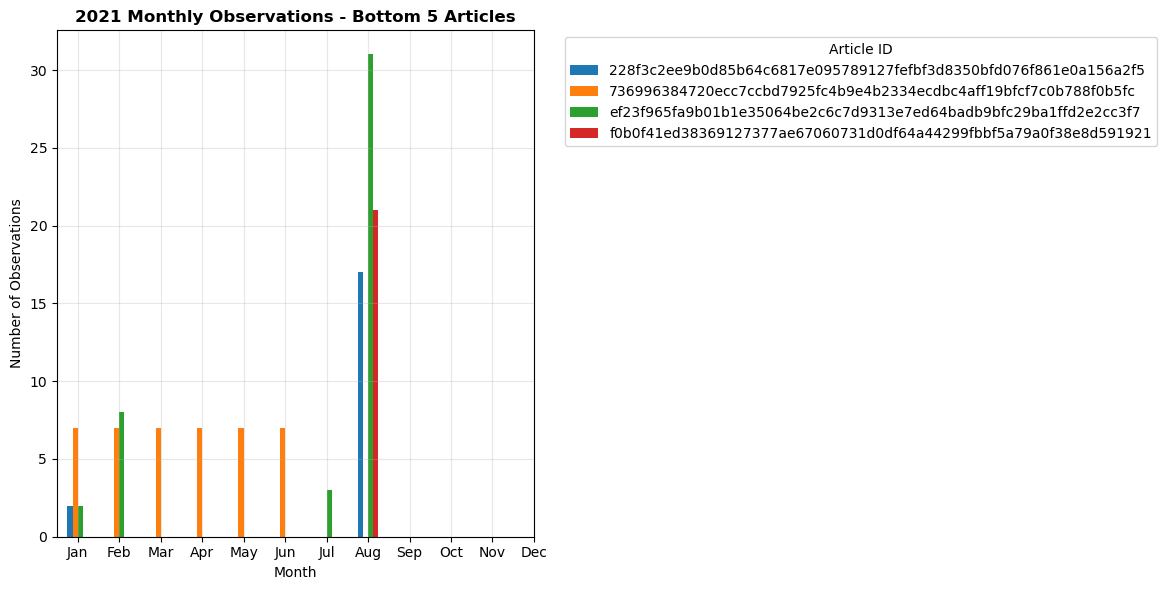

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get bottom 5 articles
bottom_5 = days_per_article.nsmallest(5, 'unique_days_count')['articleId'].tolist()

# Filter for bottom 5 + convert date format "01-01-2021" → datetime
bottom_data_2021 = df_merged[df_merged['articleId'].isin(bottom_5)].copy()
bottom_data_2021['date'] = pd.to_datetime(bottom_data_2021['date'], format='%d-%m-%Y')

# Filter for 2021 only
bottom_data_2021 = bottom_data_2021[bottom_data_2021['date'].dt.year == 2022]

# Extract month and count observations per article-month
bottom_data_2021['month'] = bottom_data_2021['date'].dt.month
monthly_counts = bottom_data_2021.groupby(['articleId', 'month']).size().reset_index(name='observations')

# Pivot for bar plot
monthly_pivot = monthly_counts.pivot(index='month', columns='articleId', values='observations').fillna(0)

# Create grouped bar plot
plt.figure(figsize=(12, 6))
monthly_pivot.plot(kind='bar', ax=plt.gca())
plt.title('2022 Monthly Observations - Bottom 5 Articles', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(title='Article ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get bottom 5 articles
bottom_5 = days_per_article.nsmallest(5, 'unique_days_count')['articleId'].tolist()

# Filter for bottom 5 + convert date format "01-01-2021" → datetime
bottom_data_2021 = df_merged[df_merged['articleId'].isin(bottom_5)].copy()
bottom_data_2021['date'] = pd.to_datetime(bottom_data_2021['date'], format='%d-%m-%Y')

# Filter for 2021 only
bottom_data_2021 = bottom_data_2021[bottom_data_2021['date'].dt.year == 2023]

# Extract month and count observations per article-month
bottom_data_2021['month'] = bottom_data_2021['date'].dt.month
monthly_counts = bottom_data_2021.groupby(['articleId', 'month']).size().reset_index(name='observations')

# Pivot for bar plot
monthly_pivot = monthly_counts.pivot(index='month', columns='articleId', values='observations').fillna(0)

# Create grouped bar plot
plt.figure(figsize=(12, 6))
monthly_pivot.plot(kind='bar', ax=plt.gca())
plt.title('2023 Monthly Observations - Bottom 5 Articles', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(title='Article ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


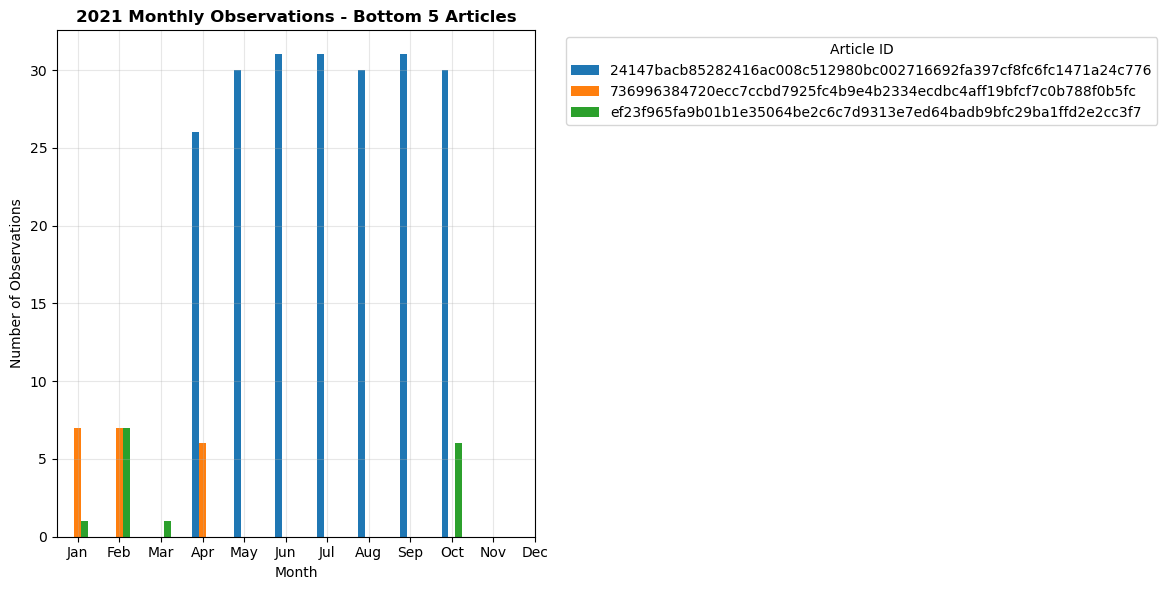

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get bottom 5 articles
bottom_5 = days_per_article.nsmallest(5, 'unique_days_count')['articleId'].tolist()

# Filter for bottom 5 + convert date format "01-01-2021" → datetime
bottom_data_2021 = df_merged[df_merged['articleId'].isin(bottom_5)].copy()
bottom_data_2021['date'] = pd.to_datetime(bottom_data_2021['date'], format='%d-%m-%Y')

# Filter for 2021 only
bottom_data_2021 = bottom_data_2021[bottom_data_2021['date'].dt.year == 2024]

# Extract month and count observations per article-month
bottom_data_2021['month'] = bottom_data_2021['date'].dt.month
monthly_counts = bottom_data_2021.groupby(['articleId', 'month']).size().reset_index(name='observations')

# Pivot for bar plot
monthly_pivot = monthly_counts.pivot(index='month', columns='articleId', values='observations').fillna(0)

# Create grouped bar plot
plt.figure(figsize=(12, 6))
monthly_pivot.plot(kind='bar', ax=plt.gca())
plt.title('2024 Monthly Observations - Bottom 5 Articles', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(title='Article ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


What are the categories of the bottom 5?
Which articles have the lowest store count? Which days are the store count max and min?

In [29]:
df_merged["storeCount"].describe()

count    343849.000000
mean        746.783518
std         245.599819
min         100.000000
25%         584.000000
50%         858.000000
75%         934.000000
max        1015.000000
Name: storeCount, dtype: float64

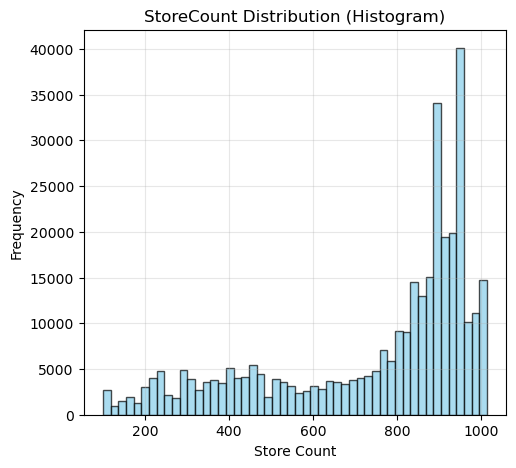

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot for storeCount
plt.figure(figsize=(12, 5))

# Subplot 1: Histogram
plt.subplot(1, 2, 1)
plt.hist(df_merged['storeCount'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('StoreCount Distribution (Histogram)')
plt.xlabel('Store Count')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

In [34]:
df_merged["category"].unique()

array(['Vlees, Kip en Vis', 'Zoetwaren', 'Wijn en PSV',
       'Was Reiniging Papier'], dtype=object)

In [35]:
df_merged["mainProductGroup"].unique()

array(['Vlees', 'Vis', 'chocolade', 'Visconserven', 'Wit fris&fruitig',
       'Rood soepel', 'Other', 'Vleesconserven', 'Afwas', 'Wit vol',
       'Lucht', 'suikerwerk', 'Wasmiddelen', 'Rood stevig'], dtype=object)